https://huggingface.co/docs/transformers/tasks/sequence_classification

https://huggingface.co/docs/transformers/model_doc/camembert#transformers.TFCamembertForSequenceClassification

# colab pre-requirements

In [1]:
"""
If running in colab, mount (download) repo and work from there to be able to use modules and download dataset(s)

PRE-REQUIREMENT:
- create a github personnal access token (finegrained or not) https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/managing-your-personal-access-tokens#creating-a-fine-grained-personal-access-token
- add it as a secret in colab with name GITHUB_ACCESS_TOKEN https://medium.com/@parthdasawant/how-to-use-secrets-in-google-colab-450c38e3ec75
"""
import os
if os.getenv("COLAB_RELEASE_TAG"): # check if running un Google Collab
  if not os.path.isdir('/content/jan24_supply_chain'): # check if repo already exists
    from google.colab import userdata
    GITHUB_ACCESS_TOKEN = userdata.get('GITHUB_ACCESS_TOKEN') # get personnal access token to github
    !git clone --quiet {'https://' + GITHUB_ACCESS_TOKEN + '@github.com/DataScientest-Studio/jan24_supply_chain.git'} # download repo
  os.chdir('/content/jan24_supply_chain/notebooks') # switch the wordking dir to the repo notebook folder (to emulate running locally to use same relative paths)

In [2]:
import data_loader
data_loader.download_datasets()
#data_loader.download_models()

Retrieving folder contents


Processing file 14RYhYjk0PQijQNi_IfdM2PmJ-QId4pf9 2.jo(bis)_paires_gpt_prompting.csv
Retrieving folder 162U61EOjKNtCuAlxuuw4rfFK9zkkr2vN chatgpt_labelled_reviews_100
Processing file 16L5uaNwEKB0EHDvy5Zyg7gsFbzITTbII edited.csv
Processing file 16INt021kWNRaHLPln4w0CO_-DtJK1mc1 raw.csv
Processing file 16_TH99Qm55ZXkj6-6KL9VJ75FEicF3_l test.csv
Processing file 16eK60cIAaubxPc5Kr_o3PQZXHDKMdaWF train.csv
Retrieving folder 15A6Ryo2CaeTwNoQGuKoxYoQZNx6Z1N5p chatgpt_labelled_reviews_1000
Processing file 15oR5DO2_dvU8wHkGUW5Am9x-xeOs-bLE edited.csv
Processing file 15zQ1bDsGzJXL-_nkubRV6a3ZYFi1vp4Y raw.csv
Processing file 16o25v9yhmQ61cCZuTu0GfhF7LdAieWxJ test.csv
Processing file 16lMGxJxAMvYmmwjwtX-o1J7D184eCUgV train.csv
Processing file 1sL_XsblcDZlpoPcZwVdev-QCqTHXQg93 processed_dataset.csv
Processing file 1ZkYlnEO2Emc7T4HAqSj8koX3BvS43ylQ test_set_chatgpt_reviews.csv
Building directory structure completed


Retrieving folder contents completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=14RYhYjk0PQijQNi_IfdM2PmJ-QId4pf9
To: /content/jan24_supply_chain/data/2.jo(bis)_paires_gpt_prompting.csv
100%|██████████| 24.7k/24.7k [00:00<00:00, 13.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=16L5uaNwEKB0EHDvy5Zyg7gsFbzITTbII
To: /content/jan24_supply_chain/data/chatgpt_labelled_reviews_100/edited.csv
100%|██████████| 148k/148k [00:00<00:00, 37.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=16INt021kWNRaHLPln4w0CO_-DtJK1mc1
To: /content/jan24_supply_chain/data/chatgpt_labelled_reviews_100/raw.csv
100%|██████████| 133k/133k [00:00<00:00, 32.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=16_TH99Qm55ZXkj6-6KL9VJ75FEicF3_l
To: /content/jan24_supply_chain/data/chatgpt_labelled_reviews_100/test.csv
100%|██████████| 23.8k/23.8k [00:00<00:00, 3.48MB/s]
Downloading...
From: https://drive.google.com/uc?id=16eK60cIAaubxPc5Kr_o3PQZXHDKMdaW

In [3]:
!pip install itables
!pip install datasets
!pip install evaluate
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 2.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.wh

# max_len check

,review,chatgpt_label,date,company,month
563,J'ai commandé une PS4 le 09/06/2018 d’un monta...,Problème de livraison,2018-09-16,CDiscount,2018-09
616,"J'ai acheté 4 tabourets, 2 sont arrivés cassés...",Problème avec le produit,2017-05-23,CDiscount,2017-05
53,"Honteux , j’ai commander un coussin spécial po...",Problème de livraison,2019-11-23,Amazon,2019-11
361,CDISCOUNT : LES ROIS DE L'ESCROQUERIE ! J'ai v...,Problème de remboursement,2018-07-19,CDiscount,2018-07
667,Depuis que le Magasin Fnac de Metz a réouvert ...,Problème sur le site,2020-05-27,Fnac,2020-05


train shape:  (800, 5)
test shape:  (200, 5)


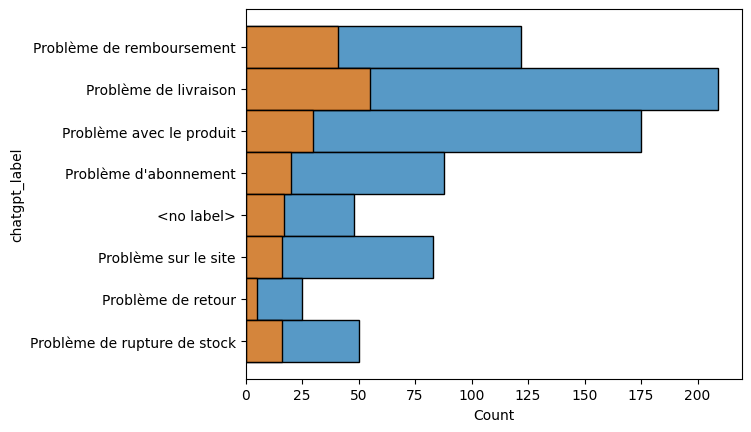

In [6]:
import pandas as pd
#from itables import show
# import ast
# import numpy as np
# import seaborn as sns

df = pd.read_csv('../data/chatgpt_labelled_reviews_1000/train.csv')
# df_test = pd.read_csv('../data/chatgpt_labelled_reviews_1000/test.csv')
# df = df.drop(["Unnamed: 0"],axis=1)
# df_test = df_test.drop(["Unnamed: 0"],axis=1)


In [8]:
from transformers import AutoTokenizer, TFCamembertForSequenceClassification
import tensorflow as tf

tokenizer = AutoTokenizer.from_pretrained("almanach/camembert-base")
model = TFCamembertForSequenceClassification.from_pretrained("almanach/camembert-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFCamembertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFCamembertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors


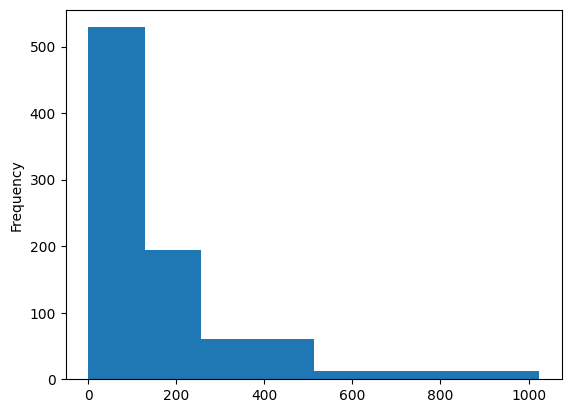

In [8]:
train_token_lengths = df.review.apply(lambda x: len(tokenizer(x, truncation=False, padding=True).input_ids))

train_token_lengths.plot.hist(bins=[0,128,256,512,1024], xlabel='seq_len');

In [9]:
tokenizer.model_max_length

512

In [10]:
model.config.max_position_embeddings

514

Camembert max seq length is 512 wich covers most of our cases.

In [ ]:
del df, tokenizer, model

# finetuning

## HF datasets w. tensorflow

#### preparing HF dataset

In [4]:
val_size=0.2


from transformers import AutoTokenizer, DataCollatorWithPadding
from datasets import load_dataset, DatasetDict
import tensorflow as tf

dataset = load_dataset("csv", data_files={'train':'../data/chatgpt_labelled_reviews_1000/train.csv', 'test':'../data/chatgpt_labelled_reviews_1000/test.csv'})
dataset = dataset.remove_columns(['Unnamed: 0','date','company','month'])
dataset = dataset.rename_columns({'chatgpt_label':'label','review':'text'})

# encodage des labels
dataset = dataset.class_encode_column("label")
num_labels = dataset['train'].features['label'].num_classes
id2label = {id: label for id, label in enumerate(dataset['train'].features['label'].names)}
label2id = {label: id for id, label in enumerate(dataset['train'].features['label'].names)}

# tokenization des reviews
tokenizer = AutoTokenizer.from_pretrained("almanach/camembert-base")

def tokenize(x):
  return tokenizer(x['text'], truncation=True) # no great to pad there as it would pad to 512 (the max len) for all batches. Will use DataCollator to pad.

dataset = dataset.map(tokenize, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf") # will dynamically pad to the longest seq in each batch

# train / validation split
dataset_train_val_split = dataset['train'].train_test_split(val_size)
dataset = DatasetDict({
    'train': dataset_train_val_split['train'],
    'val': dataset_train_val_split['test'],
    'test': dataset['test']
})
# TODO ideally we would do that with cross validation and not a split

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Casting to class labels:   0%|          | 0/800 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/200 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [39]:
dataset['train'][4]['input_ids'].__len__()

67

#### model

In [5]:
batch_size = 8
epochs = 5
lr = 2e-5
num_warmup_steps = 25 # default is linear warmup

In [51]:
# compilation keras

from transformers import TFCamembertForSequenceClassification

# load pre-trained model
model = TFCamembertForSequenceClassification.from_pretrained(
    "almanach/camembert-base",
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id)

# converting HF datasets to tf ones
tf_train_dataset = model.prepare_tf_dataset(
    dataset["train"],
    batch_size=batch_size,
    shuffle=True,
    collate_fn=data_collator)

tf_validation_dataset = model.prepare_tf_dataset(
    dataset["val"],
    batch_size=batch_size,
    shuffle=True,
    collate_fn=data_collator)

tf_test_dataset = model.prepare_tf_dataset(
    dataset["test"],
    batch_size=batch_size,
    shuffle=False,
    collate_fn=data_collator)


#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers.legacy import Adam # the new one is slow on apple silicon macs

from transformers import create_optimizer

batches_per_epoch = len(dataset["train"]) // batch_size
total_train_steps = int(batches_per_epoch * epochs)
optimizer, schedule = create_optimizer(
    init_lr=lr,
    num_warmup_steps=num_warmup_steps,
    num_train_steps=total_train_steps
    )

# metrics / evaluation

# import evaluate
# import numpy as np
# from transformers.keras_callbacks import KerasMetricCallback

# accuracy = evaluate.load("accuracy")

# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     predictions = np.argmax(predictions, axis=1)
#     return accuracy.compute(predictions=predictions, references=labels)

# metric_callback = KerasMetricCallback(
#     metric_fn=compute_metrics,
#     eval_dataset=tf_validation_dataset
#     )

# compiling
model.compile(
    optimizer=optimizer,
    metrics = ['accuracy']
    )

All PyTorch model weights were used when initializing TFCamembertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFCamembertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
# train
training_history = model.fit(
    x=tf_train_dataset,
    validation_data=tf_validation_dataset,
    epochs=epochs,
    #callbacks=metric_callback
    )

Epoch 1/5
80/80 [==============================] - 151s 780ms/step - loss: 2.0037 - accuracy: 0.2375 - val_loss: 1.8905 - val_accuracy: 0.2562
Epoch 2/5
80/80 [==============================] - 53s 656ms/step - loss: 1.8564 - accuracy: 0.3562 - val_loss: 1.6839 - val_accuracy: 0.5750
Epoch 3/5
80/80 [==============================] - 49s 607ms/step - loss: 1.6172 - accuracy: 0.5797 - val_loss: 1.4752 - val_accuracy: 0.5813
Epoch 4/5
80/80 [==============================] - 46s 579ms/step - loss: 1.4155 - accuracy: 0.6656 - val_loss: 1.3706 - val_accuracy: 0.6250
Epoch 5/5
80/80 [==============================] - 49s 611ms/step - loss: 1.3072 - accuracy: 0.7031 - val_loss: 1.3380 - val_accuracy: 0.6313


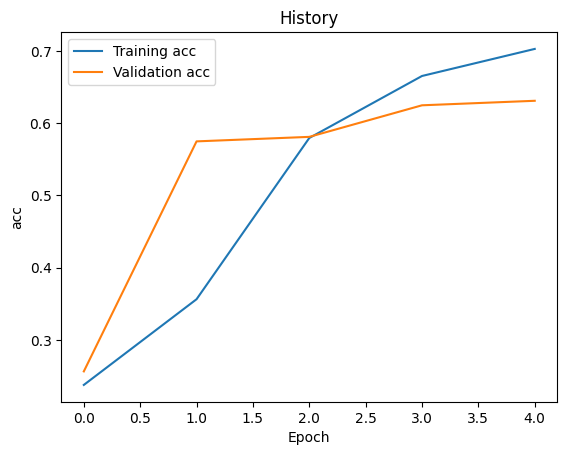

In [53]:
import matplotlib.pyplot as plt
plt.plot(training_history.history['accuracy'], label='Training acc')
plt.plot(training_history.history['val_accuracy'], label='Validation acc')
plt.title('History')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [54]:
print(training_history.history['accuracy'], '\n', training_history.history['val_accuracy'])

[0.23749999701976776, 0.35624998807907104, 0.5796874761581421, 0.6656249761581421, 0.703125] 
 [0.2562499940395355, 0.574999988079071, 0.581250011920929, 0.625, 0.6312500238418579]


### evaluation

In [55]:
test_loss, test_accuracy = model.evaluate(tf_test_dataset)
test_accuracy

25/25 [==============================] - 15s 170ms/step - loss: 1.4994 - accuracy: 0.5400


0.5400000214576721

In [ ]:
# TODO HF accuracy
#accuracy.compute.

In [56]:
import numpy as np

# get true label
y_test_true = np.concatenate([y for x, y in tf_test_dataset], axis=0)

y_test_true

array([1, 0, 3, 1, 3, 4, 6, 4, 3, 4, 2, 7, 3, 4, 3, 4, 3, 3, 0, 1, 3, 4,
       3, 6, 3, 4, 4, 4, 1, 2, 6, 2, 1, 3, 4, 1, 4, 4, 4, 3, 7, 1, 1, 4,
       3, 4, 4, 6, 1, 1, 2, 3, 5, 3, 4, 3, 7, 6, 1, 3, 2, 1, 6, 3, 4, 2,
       3, 0, 7, 7, 2, 3, 6, 3, 4, 5, 3, 6, 3, 3, 1, 6, 3, 4, 7, 0, 7, 1,
       1, 4, 3, 5, 0, 0, 1, 3, 2, 6, 3, 3, 4, 2, 7, 1, 4, 1, 4, 1, 0, 7,
       7, 4, 6, 0, 2, 7, 1, 6, 4, 2, 3, 4, 2, 3, 3, 1, 4, 4, 3, 3, 3, 0,
       3, 1, 1, 3, 1, 2, 0, 0, 3, 7, 1, 0, 3, 4, 4, 2, 3, 3, 7, 3, 0, 4,
       2, 3, 2, 0, 3, 7, 2, 1, 0, 4, 4, 3, 5, 3, 3, 6, 3, 4, 0, 4, 4, 2,
       1, 1, 3, 1, 5, 7, 2, 3, 3, 1, 3, 6, 6, 7, 3, 4, 3, 4, 4, 6, 3, 0,
       4, 2])

In [57]:
# get preds
y_test_logits = model.predict(tf_test_dataset).logits
y_test_pred = y_test_logits.argmax(axis=1)

y_test_pred

25/25 [==============================] - 13s 168ms/step


array([2, 2, 3, 1, 3, 7, 3, 4, 3, 4, 3, 7, 3, 7, 3, 1, 4, 3, 1, 1, 1, 1,
       3, 3, 3, 1, 1, 2, 1, 2, 3, 7, 1, 3, 1, 1, 2, 2, 2, 3, 2, 1, 1, 2,
       7, 1, 4, 3, 1, 1, 2, 3, 1, 3, 7, 3, 7, 3, 1, 7, 2, 1, 3, 3, 2, 2,
       3, 2, 2, 2, 2, 2, 3, 3, 4, 1, 3, 7, 3, 3, 1, 3, 3, 4, 7, 2, 2, 1,
       1, 4, 1, 1, 2, 1, 1, 3, 2, 1, 3, 1, 4, 2, 2, 1, 4, 2, 3, 1, 2, 7,
       3, 1, 7, 1, 3, 1, 1, 7, 4, 2, 3, 2, 2, 3, 3, 3, 3, 4, 3, 3, 3, 1,
       3, 1, 1, 2, 1, 2, 3, 7, 1, 7, 1, 7, 3, 1, 4, 2, 3, 3, 7, 3, 7, 4,
       4, 3, 2, 1, 3, 4, 2, 1, 7, 1, 4, 3, 1, 3, 7, 3, 3, 4, 7, 3, 4, 3,
       1, 3, 3, 1, 1, 2, 3, 3, 3, 1, 3, 4, 3, 7, 3, 3, 3, 4, 2, 3, 3, 7,
       1, 2])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                              precision    recall  f1-score   support

                  <no label>       0.00      0.00      0.00        17
    Problème avec le produit       0.50      0.87      0.63        30
       Problème d'abonnement       0.38      0.70      0.49        20
       Problème de livraison       0.66      0.82      0.73        55
   Problème de remboursement       0.80      0.39      0.52        41
          Problème de retour       0.00      0.00      0.00         5
Problème de rupture de stock       0.00      0.00      0.00        16
        Problème sur le site       0.30      0.44      0.36        16

                    accuracy                           0.54       200
                   macro avg       0.33      0.40      0.34       200
                weighted avg       0.48      0.54      0.48       200



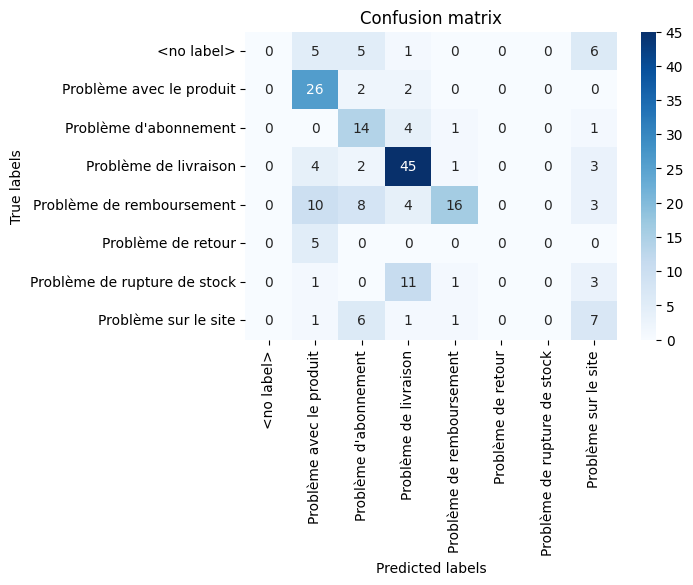

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test_true, y_test_pred, zero_division='warn', target_names=list(label2id)))

conf_matrix = confusion_matrix(y_test_true,y_test_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(label2id), yticklabels=list(label2id))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show();

In [ ]:
# TODO save/load model
# https://www.tensorflow.org/tutorials/keras/save_and_load#save_checkpoints_during_training

## HF datasets w. Trainer / pytorch

In [ ]:
# prepare HG dataset

In [10]:
# model and trainer params

from transformers import CamembertForSequenceClassification, Trainer, TrainingArguments
import numpy as np
import evaluate


output_path = "../models/hf_trainer_model"

pt_model = CamembertForSequenceClassification.from_pretrained(
    "almanach/camembert-base",
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id
    )

data_collator = DataCollatorWithPadding(
    tokenizer=tokenizer,
    return_tensors="pt"
    )

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    output_dir=output_path,
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=epochs,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)


trainer = Trainer(
    model=pt_model,
    args=training_args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['val'],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)


Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at almanach/camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [11]:
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.868475,0.362500
2,No log,1.629807,0.525000
3,No log,1.483941,0.587500
4,No log,1.419683,0.581250
5,No log,1.392721,0.618750


TrainOutput(global_step=400, training_loss=1.5735498046875, metrics={'train_runtime': 252.0571, 'train_samples_per_second': 12.696, 'train_steps_per_second': 1.587, 'total_flos': 492948672268800.0, 'train_loss': 1.5735498046875, 'epoch': 5.0})

In [14]:
trainer.evaluate()

{'eval_loss': 1.3927209377288818,
 'eval_accuracy': 0.61875,
 'eval_runtime': 3.3303,
 'eval_samples_per_second': 48.044,
 'eval_steps_per_second': 6.005,
 'epoch': 5.0}

In [13]:
trainer.evaluate(dataset['test'])

{'eval_loss': 1.4704525470733643,
 'eval_accuracy': 0.545,
 'eval_runtime': 3.5583,
 'eval_samples_per_second': 56.206,
 'eval_steps_per_second': 7.026,
 'epoch': 5.0}

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
